<h1>PzAP projekt - Jan Gerenčir

<h2>Uvod

<h4>U sklopu ovog projekta prikazat će se analiza podataka o kvalifikacijskim vremenima Formule 1 i potencijalnom utjecaju vremena na njihove rezultate. Odabrao sam ovu temu za projekt iz kolegija PzAP jer često pratim Formulu 1 i ovo je bila zanimljiva prilika za malo dublju analizu podataka koji utječu na taj sport.
<h4>Kako bismo mogli analizirati utjecaj vremena na rezultate trebamo odabrati kvalitetne datasetove nad kojima ćemo vršiti analizu. Oba dataseta možemo pronaći na stranici Kaggle. Prvi dataset koji će nam poslužiti za prikazivanje podataka o utrkama, vozačima i kvalifikacijskim vremenima je Formula 1 World Championship (1950 - 2024). Dodatni dataset s podacima s vremenom će biti F1 Weather Dataset (2018-2023).

<h3>Linkovi za dataset

<h5>Formula 1 World Championship (1950 - 2024): https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
<h5>F1 Weather Dataset (2018-2023): https://www.kaggle.com/datasets/quantumkaze/f1-weather-dataset-2018-2023

<h3>Početak impementacije

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<h5>Prvo je potrebno učitati četiri dataseta koje ćemo koristiti a to su datasetovi za: podatke o kvalifikacijama, podatke o vozačima, podatke o utrkama i podatke o timovima.

In [2]:
qualifying_data = pd.read_csv('qualifying.csv')
drivers_data = pd.read_csv('drivers.csv')
races_data = pd.read_csv('races.csv')
constructor_data = pd.read_csv('constructors.csv')

In [3]:
qualifying_data

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10249,10307,1132,822,15,77,16,1:32.431,\N,\N
10250,10308,1132,825,210,20,17,1:32.905,\N,\N
10251,10309,1132,839,214,31,18,1:34.557,\N,\N
10252,10310,1132,815,9,11,19,1:38.348,\N,\N


<h5>Za svaki učitani dataset pregledavamo koje stupce imaju da možemo odlučiti kako ćemo raditi analizu.

In [4]:
qualifying_data.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')

In [5]:
drivers_data

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


<h5>Stupci za podatke vozača

In [6]:
drivers_data.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [7]:
races_data

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


<h5>Stupci za podatke utrka

In [8]:
races_data.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [9]:
constructor_data

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


<h5>Stupci za podatke o konstruktorima

In [10]:
constructor_data.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

<h5>Prvo moramo spojiti četiri prethodno definirana dataseta u jedan dataset. To ćemo napraviti sa slijedećom funkcijom. Uzimamo razdoblje podataka od 2018. do 2023. zato što u tom rasponu imamo podatke o vremenu. Podatke spajamo preko stupaca driverId, raceId i constructorId.

In [11]:
import pandas as pd

def quali_driver_race_data():
    combined_data = pd.merge(qualifying_data, drivers_data, on='driverId')

    combined_data = pd.merge(combined_data, races_data, on='raceId')

    combined_data = pd.merge(combined_data, constructor_data, on='constructorId')

    combined_data = combined_data[(combined_data['year'] >= 2018) & (combined_data['year'] <= 2023)]

    for col in ['q1', 'q2', 'q3']:
        if col in combined_data.columns:
            combined_data[col] = combined_data[col].replace('\\N', None) 
            combined_data[col] = combined_data[col].apply(
                lambda x: sum(float(t) * 60 ** i for i, t in enumerate(reversed(str(x).split(':')))) if pd.notna(x) else None
            )

    if 'dob' in combined_data.columns:
        combined_data['dob'] = pd.to_datetime(combined_data['dob'])

    if 'date' in combined_data.columns:
        combined_data['date'] = pd.to_datetime(combined_data['date'])

    return combined_data

combined_data = quali_driver_race_data()

<h5>Ispis podataka novog dataseta i popis stupaca

In [12]:
combined_data

,qualifyId,raceId,driverId,constructorId,number_x,position,q1,q2,q3,driverRef,...,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url
7516,7540,989,1,131,44,1,82.824,82.051,81.164,hamilton,...,\N,\N,\N,\N,\N,\N,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
7517,7541,989,8,6,7,2,83.096,82.507,81.828,raikkonen,...,\N,\N,\N,\N,\N,\N,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
7518,7542,989,20,6,5,3,83.348,81.944,81.838,vettel,...,\N,\N,\N,\N,\N,\N,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
7519,7543,989,830,9,33,4,83.483,82.416,81.879,max_verstappen,...,\N,\N,\N,\N,\N,\N,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
7520,7544,989,817,9,3,5,83.494,82.897,82.152,ricciardo,...,\N,\N,\N,\N,\N,\N,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,10068,1120,832,6,55,16,84.738,NaN,NaN,sainz,...,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
10011,10069,1120,825,210,20,17,84.764,NaN,NaN,kevin_magnussen,...,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
10012,10070,1120,822,51,77,18,84.788,NaN,NaN,bottas,...,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
10013,10071,1120,855,51,24,19,85.159,NaN,NaN,zhou,...,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...


In [13]:
combined_data.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number_x',
       'position', 'q1', 'q2', 'q3', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_x', 'year', 'round',
       'circuitId', 'name_x', 'date', 'time', 'url_y', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'constructorRef', 'name_y',
       'nationality_y', 'url'],
      dtype='object')

<h5>Mičemo nepotrebne stupce iz novog dataseta

In [14]:
columns_to_drop = ['number_x', 'driverRef', 'number_y', 'code', 'url_x', 'url_y', 'nationality_y', 'url']
cleaned_data = combined_data.drop(columns=columns_to_drop)

<h5>Mijenjamo imena prikladnih stupaca

In [15]:
cleaned_data = cleaned_data.rename(columns={
    'nationality_x': 'nationality_driver',
    'name_x': 'name_race',
    'name_y': 'name_constructor'
})

<h5>Spajanje stupaca ime i prezime u jedan stupac.

In [16]:
cleaned_data['ime_prezime'] = cleaned_data['forename'] + ' ' + cleaned_data['surname']
cleaned_data = cleaned_data.drop(columns=['forename', 'surname'])

In [17]:
cleaned_data.head()

,qualifyId,raceId,driverId,constructorId,position,q1,q2,q3,dob,nationality_driver,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_constructor,ime_prezime
7516,7540,989,1,131,1,82.824,82.051,81.164,1985-01-07,British,...,\N,\N,\N,\N,\N,\N,\N,mercedes,Mercedes,Lewis Hamilton
7517,7541,989,8,6,2,83.096,82.507,81.828,1979-10-17,Finnish,...,\N,\N,\N,\N,\N,\N,\N,ferrari,Ferrari,Kimi Räikkönen
7518,7542,989,20,6,3,83.348,81.944,81.838,1987-07-03,German,...,\N,\N,\N,\N,\N,\N,\N,ferrari,Ferrari,Sebastian Vettel
7519,7543,989,830,9,4,83.483,82.416,81.879,1997-09-30,Dutch,...,\N,\N,\N,\N,\N,\N,\N,red_bull,Red Bull,Max Verstappen
7520,7544,989,817,9,5,83.494,82.897,82.152,1989-07-01,Australian,...,\N,\N,\N,\N,\N,\N,\N,red_bull,Red Bull,Daniel Ricciardo


<h5>Novi stupci

In [18]:
cleaned_data.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'position', 'q1',
       'q2', 'q3', 'dob', 'nationality_driver', 'year', 'round', 'circuitId',
       'name_race', 'date', 'time', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'constructorRef', 'name_constructor',
       'ime_prezime'],
      dtype='object')

<h3>Prosječno vrijeme Q3 po stazama

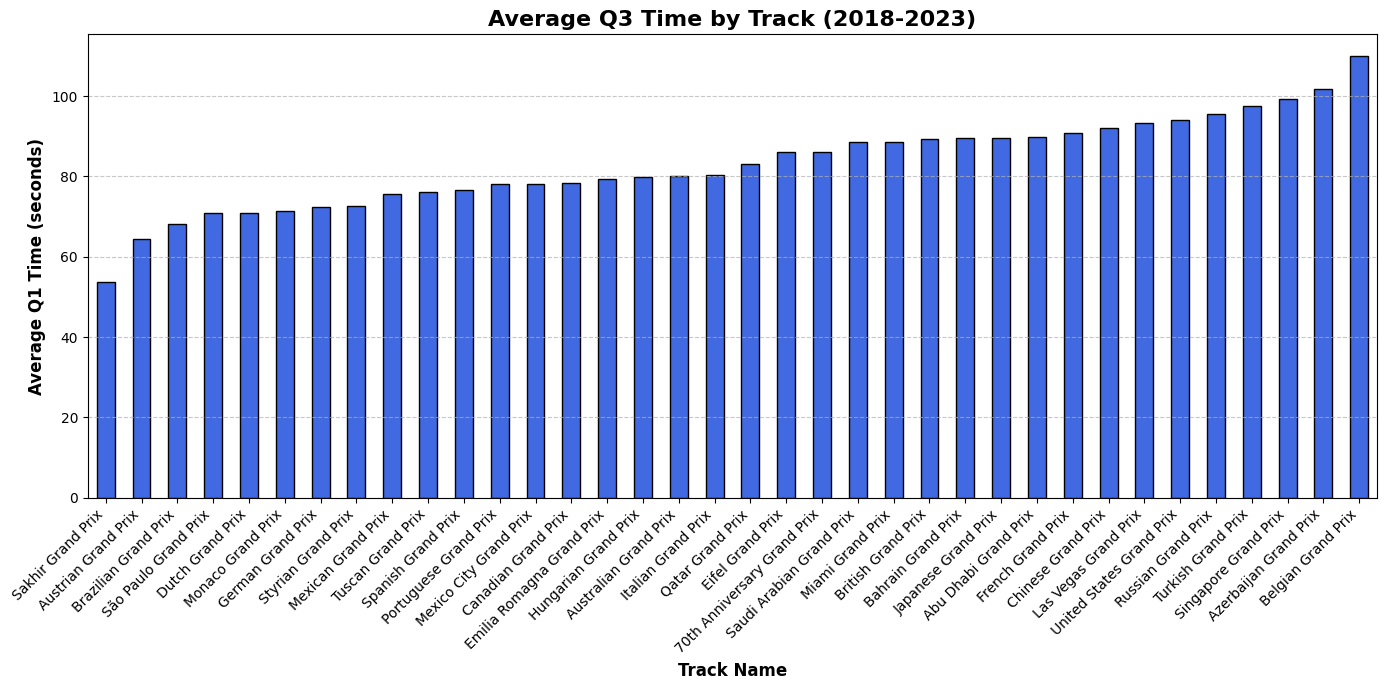

In [19]:

avg_q1_by_track = cleaned_data.groupby('name_race')['q3'].mean().sort_values()

plt.figure(figsize=(14, 7))
avg_q1_by_track.plot(kind='bar', color='royalblue', edgecolor='black')

plt.title('Average Q3 Time by Track (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Track Name', fontsize=12, fontweight='bold')
plt.ylabel('Average Q1 Time (seconds)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>Ovom analizom vidimo kako vremena kvalifikacija utrka bitno variraju. Najbrži prosjek ima Sakhir GP dok najsporiji ima Belgian GP.

<h5>Po ovoj analizi možemo vidjeti kako se kreće prosječno vrijeme kruga u Q3 kvalifikacijskoj rundi kroz sezonu. 

<h3>Analiza najdominantnijeg vozača po broju pole pozicija

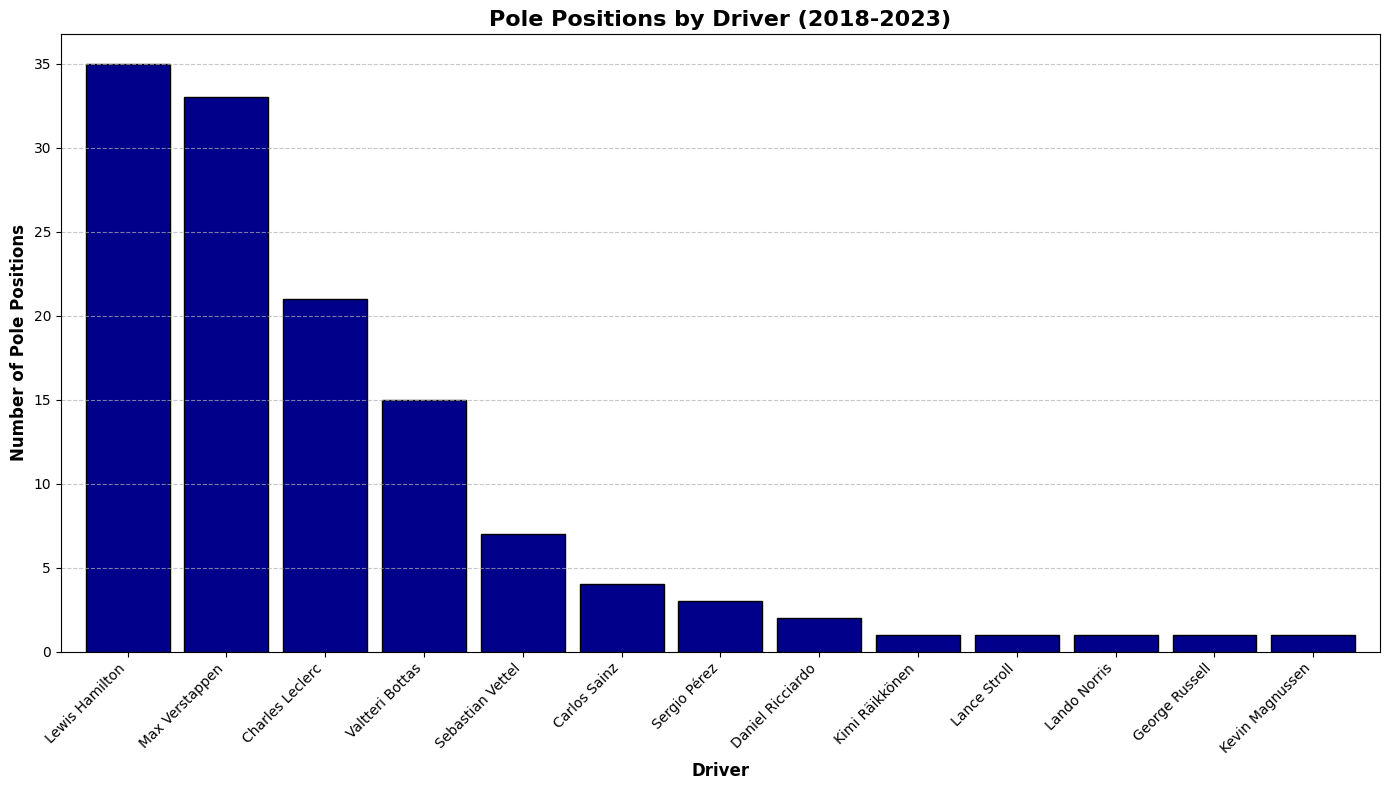

In [20]:
pole_positions = cleaned_data[cleaned_data['position'] == 1]

dominant_drivers = pole_positions['ime_prezime'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
dominant_drivers.plot(kind='bar', color='darkblue', edgecolor='black', width=0.85)

plt.title('Pole Positions by Driver (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Driver', fontsize=12, fontweight='bold')
plt.ylabel('Number of Pole Positions', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>Ovom analizom utvrđujemo kako je vozač s najviše pole pozicija odnosno najbržim krugom Lewis Hamilton.

<h3>Najdominantniji timovi po pole pozicijama

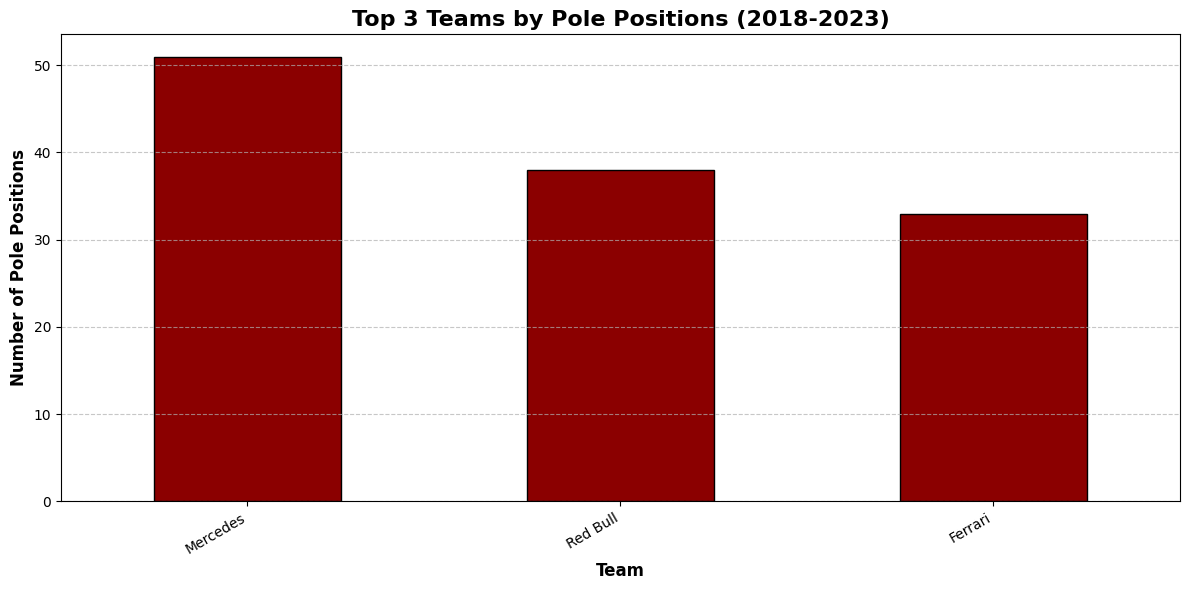

In [21]:
pole_positions = cleaned_data[cleaned_data['position'] == 1]

top_teams = pole_positions['name_constructor'].value_counts().nlargest(3)

plt.figure(figsize=(12, 6))
top_teams.plot(kind='bar', color='darkred', edgecolor='black')

plt.title('Top 3 Teams by Pole Positions (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12, fontweight='bold')
plt.ylabel('Number of Pole Positions', fontsize=12, fontweight='bold')

plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>U ovoj analizi možemo vidjeti koja su tri tima najdominantnija po broju pole pozicija. Vidimo da Mercedes ima najviše pole pozicija.

<h3>Usporedba performansi unutar tima Mercedes između vozača Lewis Hamilton i Valtteri Bottas.

/var/folders/pk/twx4xjt975j0m0mksj2lr62r0000gn/T/ipykernel_4124/2475368677.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=q3_data, x='ime_prezime', y='q3', palette=["blue", "black"])


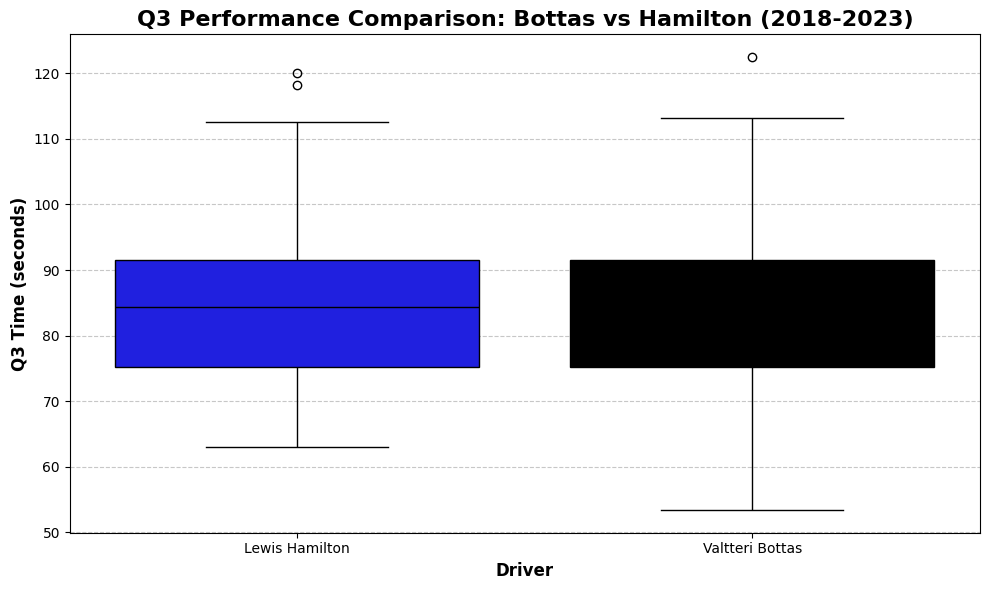

In [22]:
q3_data = cleaned_data.dropna(subset=['q3'])

selected_drivers = ["Valtteri Bottas", "Lewis Hamilton"]
q3_data = q3_data[q3_data['ime_prezime'].isin(selected_drivers)]

q3_data = q3_data[['ime_prezime', 'q3']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=q3_data, x='ime_prezime', y='q3', palette=["blue", "black"])

plt.title('Q3 Performance Comparison: Bottas vs Hamilton (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Driver', fontsize=12, fontweight='bold')
plt.ylabel('Q3 Time (seconds)', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>Po ovoj analizi možemo vidjeti kako je skup podataka kod Hamiltona uže rasprostranjen što znači da je on bio konzistentniji odnosno da je varijacija između njegovih rezultata manja.

<h3>Dob vozača i performanse

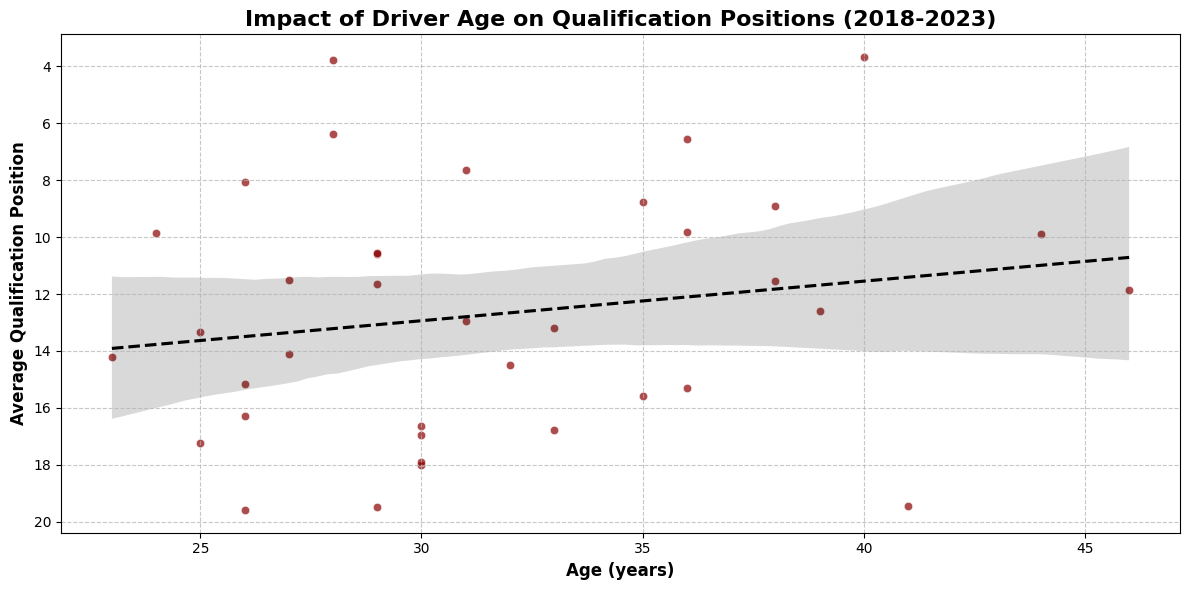

In [23]:
data = cleaned_data.copy()

current_year = datetime.now().year
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = current_year - data['dob'].dt.year

age_vs_position = data.groupby('ime_prezime').agg({
    'age': 'mean', 
    'position': 'mean'  
}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=age_vs_position, x='age', y='position', color='darkred', alpha=0.7)

sns.regplot(data=age_vs_position, x='age', y='position', scatter=False, color='black', line_kws={"linestyle": "dashed"})

plt.title('Impact of Driver Age on Qualification Positions (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Average Qualification Position', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis()

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h5>U ovoj analizi vidimo da regresijska linija lagano raste što znači da stariji vozači u prosjeku imaju nešto lošije kvalifikacijske pozicije. Većina najboljih kvalifikacijskih pozicija po ovom grafu dolazi iz raspona godina vozača od 25 do 30 godine što bi odgovaralo očekivanjima i poznatom razdoblju koje se smatra "prime" vozača.

<h3>Trendovi napretka 5 vozača u Q1

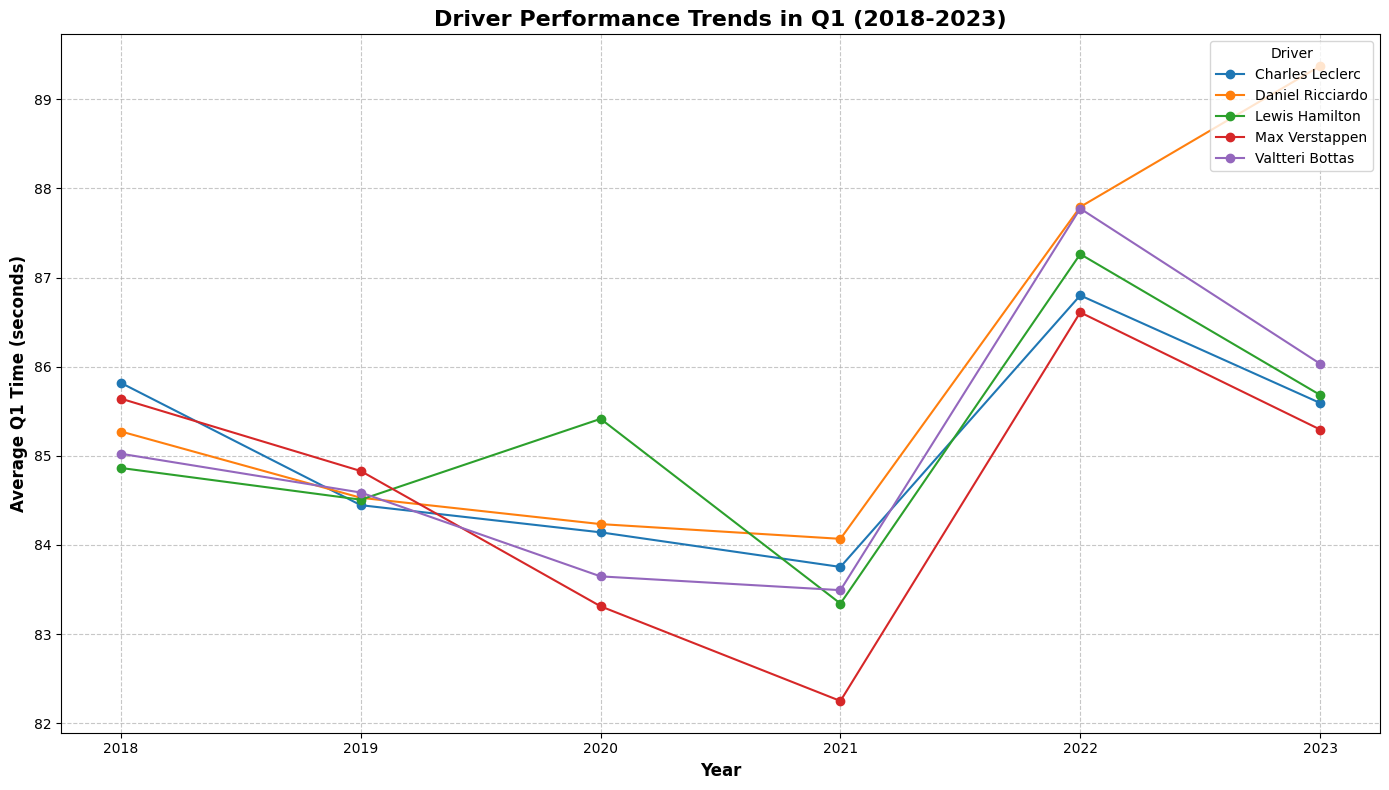

In [24]:
selected_drivers = ['Lewis Hamilton', 'Valtteri Bottas', 'Charles Leclerc', 'Max Verstappen', 'Daniel Ricciardo']

avg_q1_by_year_driver = cleaned_data.groupby(['year', 'ime_prezime'])['q1'].mean().reset_index()

avg_q1_by_year_driver = avg_q1_by_year_driver[avg_q1_by_year_driver['ime_prezime'].isin(selected_drivers)]

pivot_data = avg_q1_by_year_driver.pivot(index='year', columns='ime_prezime', values='q1')

plt.figure(figsize=(14, 8))
pivot_data.plot(ax=plt.gca(), marker='o', linestyle='-')

plt.title('Driver Performance Trends in Q1 (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Q1 Time (seconds)', fontsize=12, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Driver', fontsize=10, loc='upper right')
plt.tight_layout()

plt.show()

<h5>U ovoj analizi uzeli smo 5 vozača: Lewis Hamilton, Valtteri Bottas, Max Verstappen, Daniel Ricciardo i Charles Leclerc. Jedina odstupanja na grafu su Hamilton koji je bio malo sporiji u 2020. sezoni tijekom Q1 kvalifikacija i Daniel Ricciardo koji je imao sporije prosječno vrijeme kvalifikacija u 2023. sezoni. Uzevši sve u obzir možemo vidjeti da su odstupanja minimalna što bi bio pokazatelj nevjerojatne konzistencije kod vozača.

<h5>U ovoj analizi možemo vidjeti kako se kreću prosječna vremena na utrci SPA Francorchamps ili Belgian GP kroz godine. Kao što možemo vidjeti 2018, 2019, 2020 i 2021 su vremena vrlo slična dok u 2022 imamo dosta sporija vremena i onda u 2023 dosta brža vremena.

<h2>Uvođenje novog dataseta s vremenom

In [25]:
weather_data = pd.read_json('F1 Weather(2023-2018).json')

In [26]:
weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018
...,...,...,...,...,...,...,...,...,...,...
18209,0 days 02:31:06.568000,26.4,54.0,1015.7,False,30.8,279,1.7,22,2023
18210,0 days 02:32:06.583000,26.4,54.0,1015.7,False,30.8,283,1.8,22,2023
18211,0 days 02:33:06.567000,26.4,54.0,1015.7,False,30.6,314,1.5,22,2023
18212,0 days 02:34:06.581000,26.4,54.0,1015.7,False,30.6,273,1.5,22,2023


In [27]:
weather_data.columns

Index(['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Round Number', 'Year'],
      dtype='object')

<h3>Spajamo prvi dataset s novim datasetom s vremenom

In [28]:
merged_data = pd.merge(cleaned_data, weather_data, 
                       left_on=['year', 'round'], 
                       right_on=['Year', 'Round Number'], 
                       how='inner')


<h3>Pole pozicije kada je padala kiša

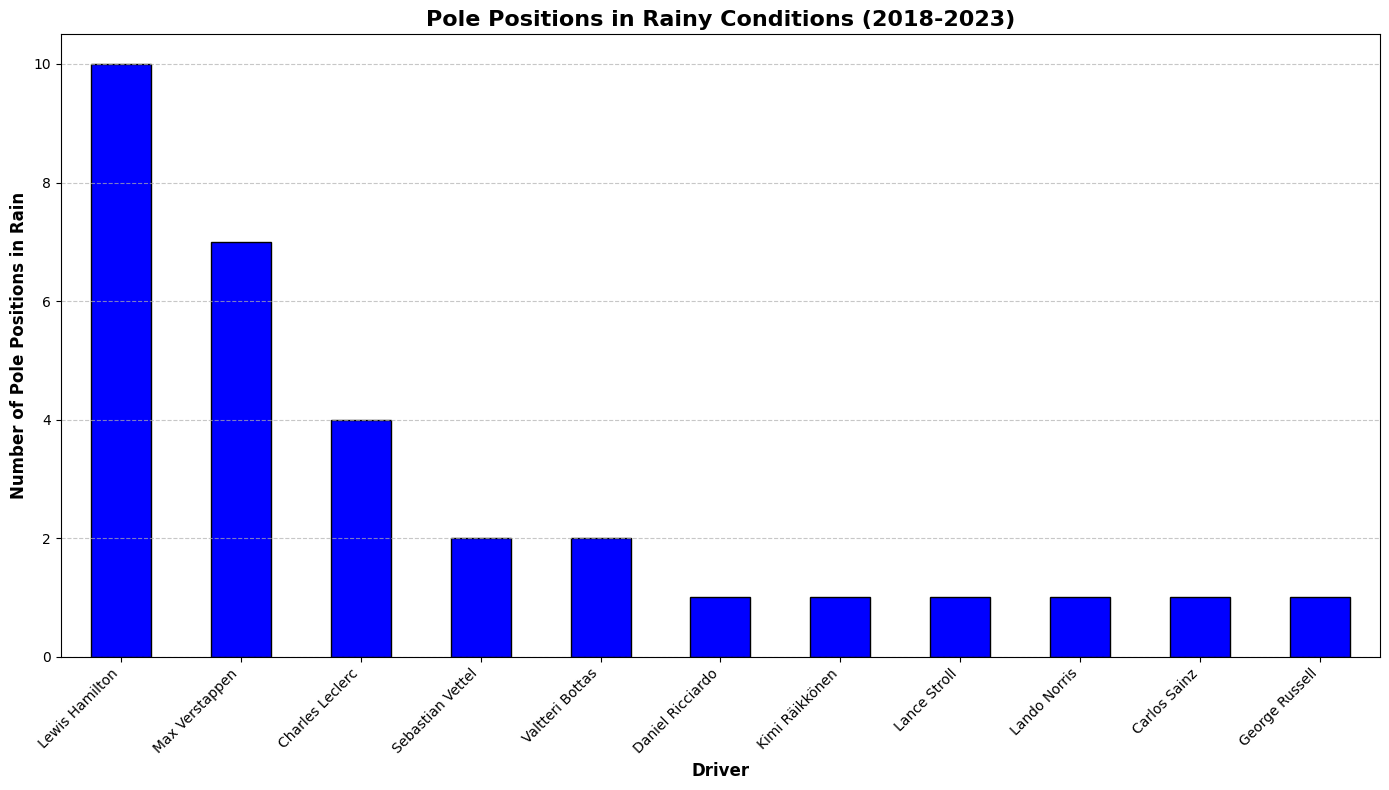

In [29]:
rainy_pole_positions = merged_data[(merged_data['position'] == 1) & (merged_data['Rainfall'] == True)]

rainy_pole_positions = rainy_pole_positions[['ime_prezime', 'year', 'round']].drop_duplicates()

pole_counts = rainy_pole_positions['ime_prezime'].value_counts()

plt.figure(figsize=(14, 8))
pole_counts.sort_values(ascending=False).plot(kind='bar', color='blue', edgecolor='black')

plt.title('Pole Positions in Rainy Conditions (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Driver', fontsize=12, fontweight='bold')
plt.ylabel('Number of Pole Positions in Rain', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>Ovom analizom prikazujemo koji je vozač najdominantniji po pole pozicijama tijekom kišnih uvjeta. Na vrhu je idalje Lewis Hamilton što je i očekivano ali možemo vidjeti kako je jedini pole position za vozače Lance Stroll, George Russell, Kimi Raikkonen i Lando Norris bio tijekom kišnog vremena. To nas vodi do zaključka da kišni uvjeti na stazi znače i da se vozači koji nisu inače najbrži mogu kvalificirati na prvu poziciju.

<h3>Pole po timovima tijekom kiše

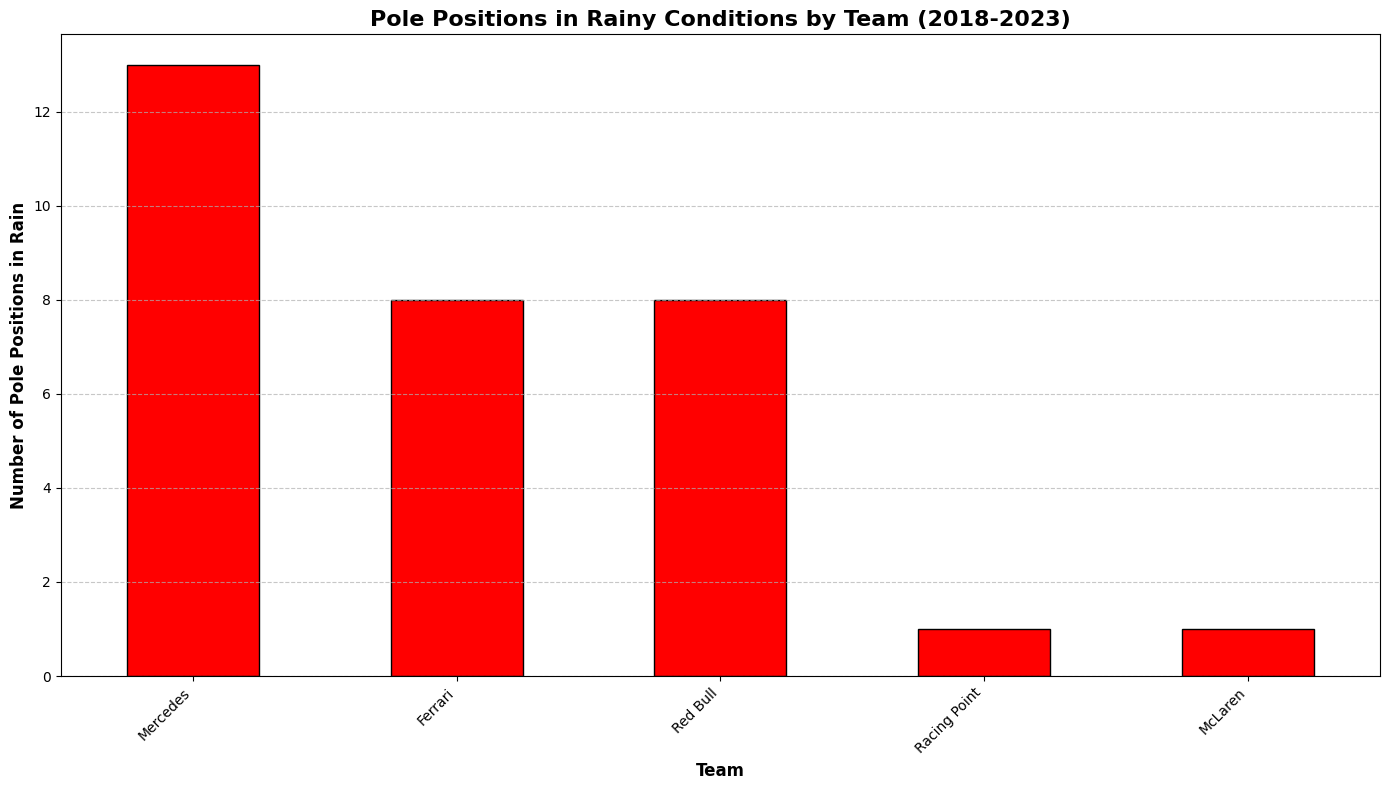

In [30]:
rainy_pole_positions = merged_data[(merged_data['position'] == 1) & (merged_data['Rainfall'] == True)]

rainy_pole_positions = rainy_pole_positions[['name_constructor', 'year', 'round']].drop_duplicates()

pole_counts = rainy_pole_positions['name_constructor'].value_counts()

plt.figure(figsize=(14, 8))
pole_counts.sort_values(ascending=False).plot(kind='bar', color='red', edgecolor='black')

plt.title('Pole Positions in Rainy Conditions by Team (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12, fontweight='bold')
plt.ylabel('Number of Pole Positions in Rain', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>U idućoj analizi možemo vidjeti 5 najdominantnijih timova u kvalifikacijama tijekom kišnih uvjeta

<h3>Promjena pozicija po kišnom vremenu

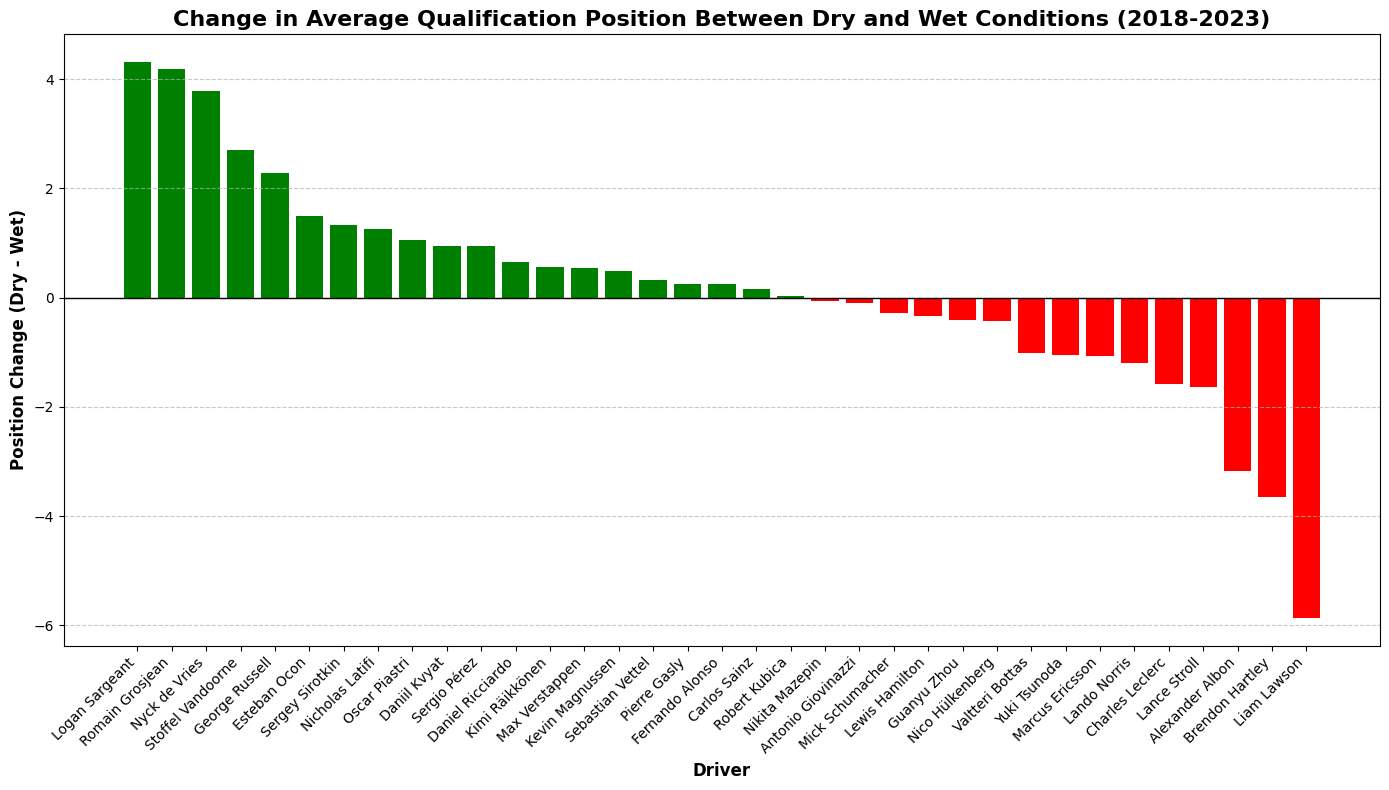

In [31]:
merged_data['Rainfall'] = merged_data['Rainfall'].astype(str).str.lower() == 'true'

dry_positions = merged_data[merged_data['Rainfall'] == False].groupby('ime_prezime')['position'].mean().reset_index()
dry_positions.rename(columns={'position': 'avg_position_dry'}, inplace=True)

wet_positions = merged_data[merged_data['Rainfall'] == True].groupby('ime_prezime')['position'].mean().reset_index()
wet_positions.rename(columns={'position': 'avg_position_wet'}, inplace=True)

position_comparison = pd.merge(dry_positions, wet_positions, on='ime_prezime', how='inner')

position_comparison['position_change'] = position_comparison['avg_position_dry'] - position_comparison['avg_position_wet']

position_comparison = position_comparison.sort_values(by='position_change', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(position_comparison['ime_prezime'], position_comparison['position_change'], color=['green' if x > 0 else 'red' for x in position_comparison['position_change']])

plt.title('Change in Average Qualification Position Between Dry and Wet Conditions (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Driver', fontsize=12, fontweight='bold')
plt.ylabel('Position Change (Dry - Wet)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.axhline(0, color='black', linewidth=1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>Kako bismo vidjeli utjecaj kišovitog vremena na kvalifikacijske pozicije napravit ćemo graf u kojem vidimo koji vozači dobiju odnosno izgube najviše pozicija u slučaju kišovitog vremena. U prosjeku najviše dobivenih pozicija ostvaruje Logan Sargeant, a najviše izgubljenih pozicija Liam Lawson. Što se tiče tri najdominantnija vozača vidimo kako najbolje stoji Max Verstappen koji u prosjeku dobije pozicije kada pada kiša. Nakon njega slijedi Lewis Hamilton koji je negdje oko "nule" što je za očekivati jer je on najčešće na prvoj poziciji pa uglavnom može samo izgubiti a ne dobiti pozicije. Nakraju vidimo da Charles Leclerc u prosjeku izgubi padne jednu kvalifikacijsku poziciju kad je kišovito vrijeme.

<h3>Utjecaj dobi vozača na performanse u kišnim uvjetima

/var/folders/pk/twx4xjt975j0m0mksj2lr62r0000gn/T/ipykernel_4124/1091739199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_data['dob'] = pd.to_datetime(rainy_data['dob'])
/var/folders/pk/twx4xjt975j0m0mksj2lr62r0000gn/T/ipykernel_4124/1091739199.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_data['age'] = rainy_data['year'] - rainy_data['dob'].dt.year


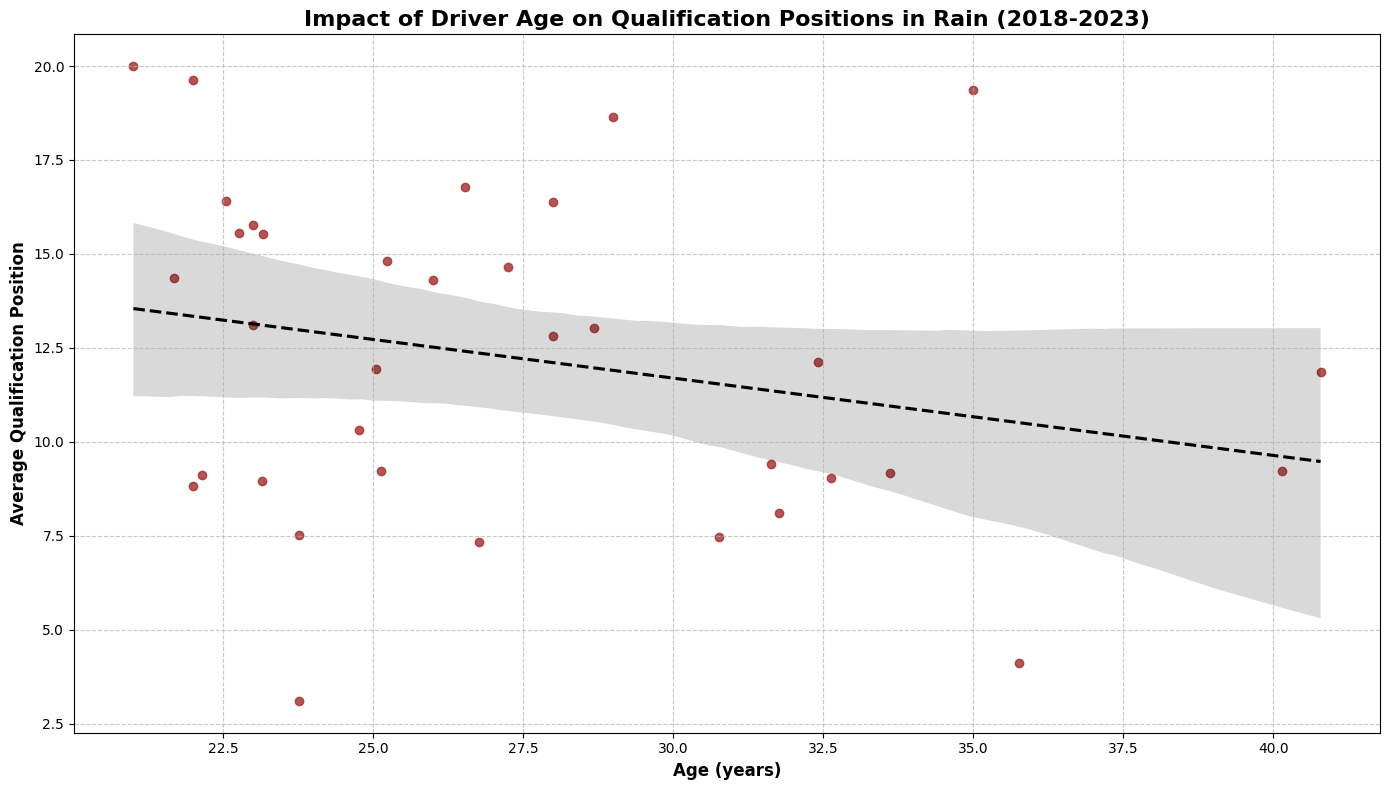

In [32]:
merged_data['Rainfall'] = merged_data['Rainfall'].astype(str).str.lower() == 'true'

rainy_data = merged_data[merged_data['Rainfall'] == True]

rainy_data['dob'] = pd.to_datetime(rainy_data['dob'])
rainy_data['age'] = rainy_data['year'] - rainy_data['dob'].dt.year 

age_vs_position = rainy_data.groupby('ime_prezime').agg({'age': 'mean', 'position': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
sns.regplot(data=age_vs_position, x='age', y='position', scatter_kws={'color': 'brown'}, line_kws={'color': 'black', 'linestyle': '--'})

plt.title('Impact of Driver Age on Qualification Positions in Rain (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Average Qualification Position', fontsize=12, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h5>U ovom grafu prikazujemo prosječne pozicije na kvalifikacijama s kišnim uvjetima i uspoređujemo ih s dobi vozača. Iz negativnog nagiba regresijske linije možemo zaključiti kako stariji vozači ostvaruju bolje rezultate u kišnim uvjetima. Ovo je očekivani rezultat jer generalno stariji vozači imaju više iskustva pa su po prirodi bolji u zahtjevnim situacijama.

<h3>Najefikasniji timovi na visokim temperaturama

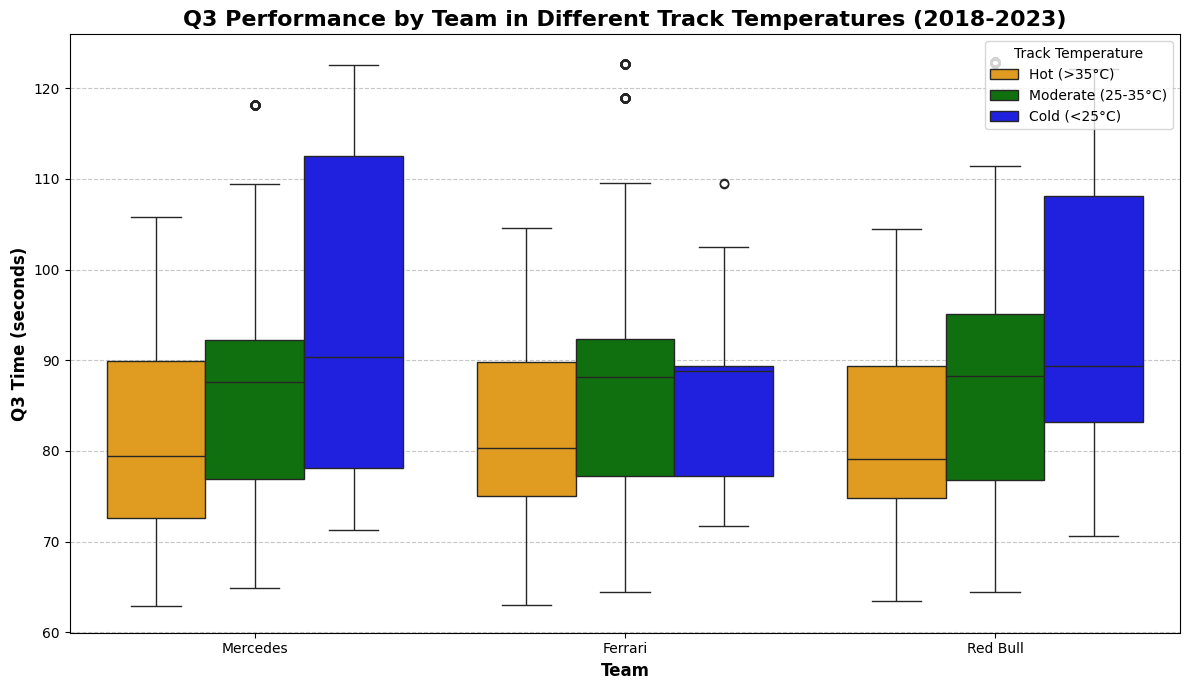

In [33]:
filtered_data = merged_data.dropna(subset=['q3', 'TrackTemp'])

selected_teams = ['Mercedes', 'Ferrari', 'Red Bull']
filtered_data = filtered_data[filtered_data['name_constructor'].isin(selected_teams)]

def categorize_temperature(temp):
    if temp < 25:
        return 'Cold (<25°C)'
    elif 25 <= temp <= 35:
        return 'Moderate (25-35°C)'
    else:
        return 'Hot (>35°C)'

filtered_data['Temp_Category'] = filtered_data['TrackTemp'].apply(categorize_temperature)

custom_palette = {'Cold (<25°C)': 'blue', 'Moderate (25-35°C)': 'green', 'Hot (>35°C)': 'orange'}

plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_data, x='name_constructor', y='q3', hue='Temp_Category', palette=custom_palette)

plt.title('Q3 Performance by Team in Different Track Temperatures (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12, fontweight='bold')
plt.ylabel('Q3 Time (seconds)', fontsize=12, fontweight='bold')

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Track Temperature', fontsize=10, loc='upper right')

plt.tight_layout()

plt.show()

<h5>Ovim boxplot dijagramima ćemo prikazati kako se kreću performanse tri najdominantnija tima po temperaturi staze. Možemo vidjeti da se najbrže kvalifikacije događaju na toplim stazama, dok su hladne temperature veći izazov za sve timove što je očekivani rezultat analize. Mercedes izgleda najstabilniji na toplim stazama, zbog manje varijacije podataka, dok Red Bull pokazuje veću varijabilnost. Možemo vidjeti da Ferrari ima jako konzistentna vremena i jedini pad se bilježi na hladnijim temperaturama staze.

<h3>Omjer brzine vjetra i performansi

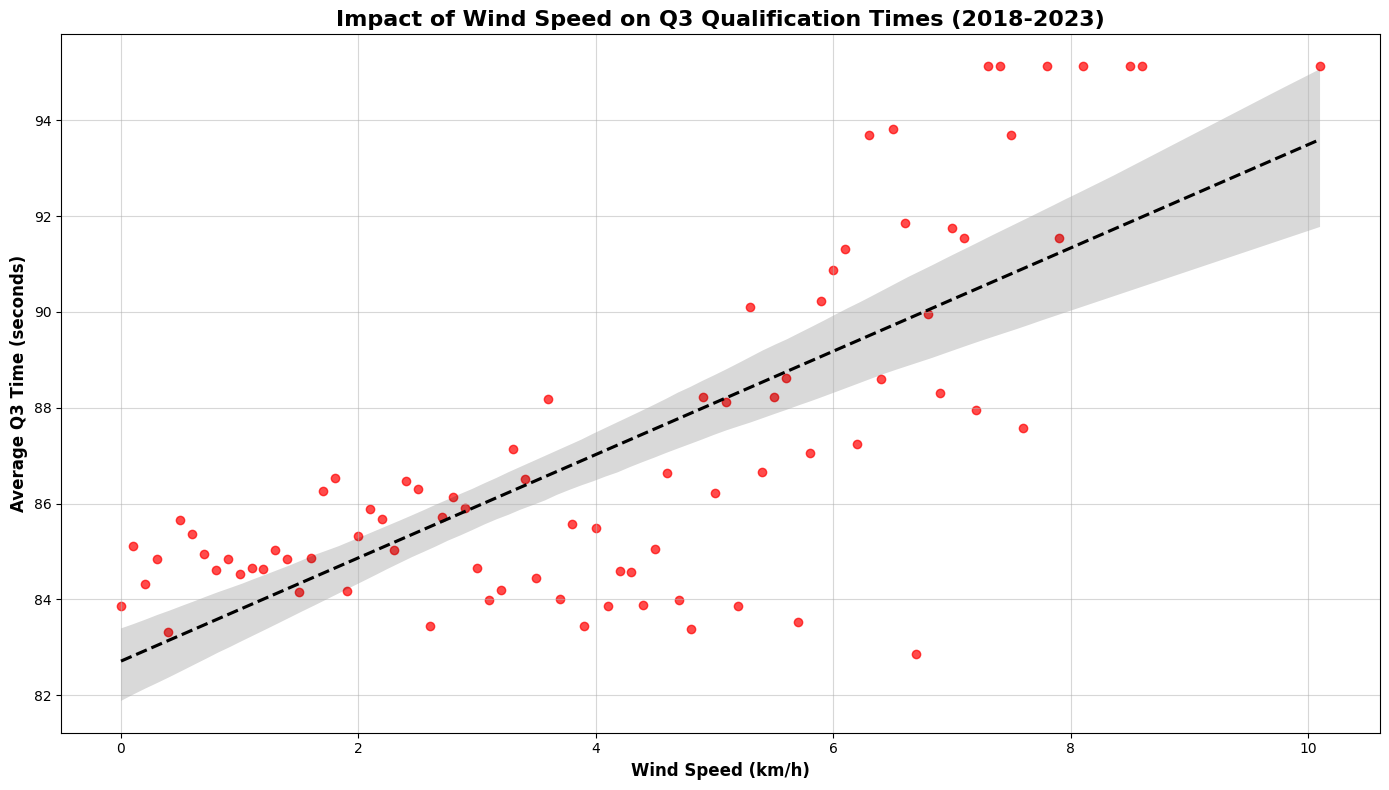

Correlation coefficient between wind speed and Q3 qualification times: 0.75


In [34]:
filtered_data = merged_data.dropna(subset=['q3', 'WindSpeed'])

wind_q3_data = filtered_data.groupby('WindSpeed')['q3'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.regplot(x=wind_q3_data['WindSpeed'], y=wind_q3_data['q3'], scatter_kws={"color": "red", "alpha": 0.7}, line_kws={"color": "black", "linestyle": "dashed"})

plt.title('Impact of Wind Speed on Q3 Qualification Times (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Wind Speed (km/h)', fontsize=12, fontweight='bold')
plt.ylabel('Average Q3 Time (seconds)', fontsize=12, fontweight='bold')

plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

correlation = wind_q3_data['WindSpeed'].corr(wind_q3_data['q3'])
print(f"Correlation coefficient between wind speed and Q3 qualification times: {correlation:.2f}")

<h5>Ova analiza istražuje kako brzina vjetra utječe na kvalifikacijska vremena u Q3 sesijama između 2018. i 2023. godine. Na grafu vidimo scatter plot s crnom regresijskom linijom koja pokazuje pozitivnu korelaciju između brzine vjetra i vremena postignutih u Q3. To znači da su u uvjetima jačeg vjetra vozači u prosjeku postizali sporija vremena. Koeficijent korelacije iznosi 0.75, što ukazuje na snažnu pozitivnu vezu između ove dvije varijable. Širi raspon podataka pri višim brzinama vjetra također sugerira veću varijabilnost performansi u takvim uvjetima.

<h2>Kritički osvrt

<h4>Analizom ovih datasetova uspjeli smo utvrditi da količina kiše, temperatura staze i brzina vjetra utječu na performanse vozača. Za neke druge parametre poput utjecaja tlaka zraka nismo uspjeli pronaći značajnu korelaciju. Što se tiče detaljnije analize bilo bi bolje da dataset sa podatcima vremena pokriva veći raspon nego što je trenutačno od 2018. do 2023. godine. Također bilo bi bolje da dataset sadrži podatke o postotcima vlažnosti staze jer bi nam to prikazalo punu sliku utjecaja raznih vremenskih uvjeta na performanse.

<h2>Postavljanje na bazu

<h3>Uvoz u podataka u bazu

In [35]:
import sqlite3
import pandas as pd

qualifying_file_path = 'qualifying.csv'
drivers_file_path = 'drivers.csv'
races_file_path = 'races.csv'
weather_file_path = 'F1 Weather(2023-2018).json'
constructors_file_path = 'constructors.csv'  

qualifying_data = pd.read_csv(qualifying_file_path)
drivers_data = pd.read_csv(drivers_file_path)
races_data = pd.read_csv(races_file_path)
weather_data = pd.read_json(weather_file_path)
constructors_data = pd.read_csv(constructors_file_path) 

conn = sqlite3.connect('f1_data.db')

qualifying_data.to_sql('Qualifying', conn, if_exists='replace', index=False)
drivers_data.to_sql('Drivers', conn, if_exists='replace', index=False)
races_data.to_sql('Races', conn, if_exists='replace', index=False)
weather_data.to_sql('Weather', conn, if_exists='replace', index=False)
constructors_data.to_sql('Constructors', conn, if_exists='replace', index=False) 

conn.commit()
conn.close()

print("Podaci su dodani")

Podaci su dodani


<h3>Pokretanje flask servera

In [36]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)

def connect_db():
    conn = sqlite3.connect('f1_data.db')
    conn.row_factory = sqlite3.Row  
    return conn

@app.route('/qualifying', methods=['GET'])
def get_qualifying():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM Qualifying")
        rows = cursor.fetchall()
        qualifying = [dict(row) for row in rows]
        return jsonify(qualifying), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/drivers', methods=['GET'])
def get_drivers():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM Drivers")
        rows = cursor.fetchall()
        drivers = [dict(row) for row in rows]
        return jsonify(drivers), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/races', methods=['GET'])
def get_races():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM Races")
        rows = cursor.fetchall()
        races = [dict(row) for row in rows]
        return jsonify(races), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/weather', methods=['GET'])
def get_weather():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM Weather")
        rows = cursor.fetchall()
        weather = [dict(row) for row in rows]
        return jsonify(weather), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/constructors', methods=['GET'])
def get_constructors():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM Constructors")
        rows = cursor.fetchall()
        constructors = [dict(row) for row in rows]
        return jsonify(constructors), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

if __name__ == '__main__':
    app.run(debug=True, port=5001, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit


<h5>Možemo vidjeti da se server uspješno pokrenuo i prikazao podatke na sve 4 putanje za dodane podatke.

<h2>Zaključak

<h4>Ovim projektom smo naučili kako možemo kombinirati podatke iz više datasetova od jednog. Također koristili smo heterogene tipove podataka i pokazivali smo određene korelacije između njih. U našim datasetovima pronašli smo korelacije između temperature staze, količine kiše, brzine vjetra i performansi vozača u vidu njihovih kvalifikacijskih rezultata. Također raznim analizama nad samo prvim datasetom prikazali smo odnose između podataka. Za daljnju analizu bilo bi potrebno koristiti opširniji dataset za podatke o vremenu koji bi uključivali i podatke o vlažnosti same staze. Kada bi to bilo moguće ovakve analize bi definitivno bile od koristi timovima koji se natječu radi bolje procjene taktike tijekom utrka.

<h2>Literatura

<h5>W. McKinney, Python for Data Analysis, 3rd ed. O’Reilly Media, 2023. [Online]. Available: https://wesmckinney.com/book/. Accessed: Jan. 25, 2025.
<h5>A. B. Downey, Think Stats: Probability and Statistics for Programmers, 3rd ed.. Green Tea Press, 2023. [Online]. Available: https://greenteapress.com/wp/think-stats-3e/ Accessed: Jan. 25, 2025.